# 程式實作:把連續型變數離散化

# 練習目標
- 使用 Day 012 的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# 練習重點
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


dir_data = './data/Part01/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數 (DAYS_EMPLOYED) 為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

**參考 Day 12 程式，離散化覺得有興趣的欄位，並嘗試找出有趣的訊息**

雖然由之前的分析發現 DAYS_BIRTH 與 TARGET 的相關係數只有 -0.07，  
但在往後的課程裡，為了實際解決問題，我們將需透過一些處理方法，改善相關係數。  
目前我們先以對資料的常識理解，去觀察這兩個欄位的交叉狀況。

In [5]:
# 先來看看 'DAYS_BIRTH' 的統計描述吧 (pandas.describe())
print("Correlation between TARGET and DAYS_BIRTH", app_train['DAYS_BIRTH'].corr(app_train['TARGET']))
(app_train['DAYS_BIRTH']/365).describe()

Correlation between TARGET and DAYS_BIRTH -0.07823930830982712


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

年齡最小是 20，最大是 69，那我們可以把年齡每 5 歲為一組後再來觀察其與預測目標的關係

In [6]:
# 將年齡相關資料, 另外存成一個 DataFrame 來處理
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# 將年齡資料離散化 / 分組
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [7]:
# 依照組別彙整年齡資料 "每一欄的平均值"
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


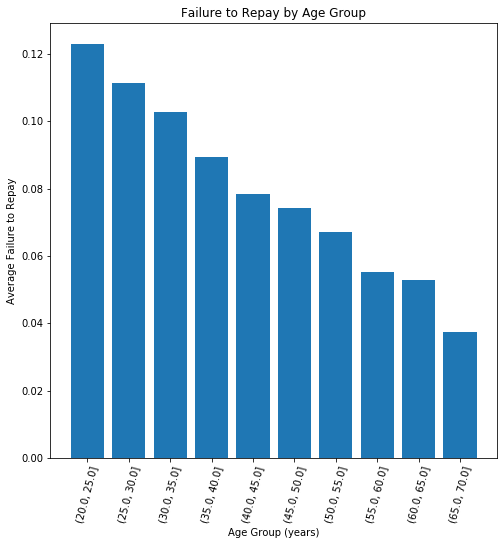

In [8]:
plt.figure(figsize = (8, 8))

# 繪製目標值平均與分組組別的長條圖
plt.bar(range(len(age_groups.index)), age_groups['TARGET'])
# 加上 X, y 座標說明, 以及圖表的標題
plt.xticks(range(len(age_groups.index)), age_groups.index, rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Average Failure to Repay')
plt.title('Failure to Repay by Age Group');

可以非常明顯地看出趨勢，越年輕的客戶族群的違約遲繳的可能越大！
(還沒有做離散化是看不出來的)

---
再來看看 'DAYS_LAST_PHONE_CHANGE'

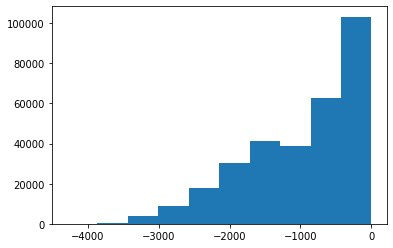

,DAYS_LAST_PHONE_CHANGE
-3731.0,1
-3583.0,1
-3900.0,1
-3581.0,1
-3771.0,1
...,...
-4.0,1285
-3.0,1763
-2.0,2318
-1.0,2812


In [9]:
plt.hist(app_train['DAYS_LAST_PHONE_CHANGE'].dropna())
plt.show()
pd.DataFrame(app_train['DAYS_LAST_PHONE_CHANGE'].value_counts()).sort_values(by='DAYS_LAST_PHONE_CHANGE')

In [10]:
app_train["DAYS_LAST_PHONE_CHANGE"]=abs(app_train["DAYS_LAST_PHONE_CHANGE"])
(app_train['DAYS_LAST_PHONE_CHANGE']).describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [11]:
cut_rule=np.linspace(0,max(app_train["DAYS_LAST_PHONE_CHANGE"]),11)
app_train["DAYS_LAST_PHONE_CHANGE_GROUP"]=pd.cut(app_train["DAYS_LAST_PHONE_CHANGE"],cut_rule)
app_train["DAYS_LAST_PHONE_CHANGE_GROUP"].value_counts()
phone_groups=app_train.groupby('DAYS_LAST_PHONE_CHANGE_GROUP').mean()
phone_groups

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
DAYS_LAST_PHONE_CHANGE_GROUP,,,,,,,,,,,,,,,,,,,,,
"(0.0, 429.2]",278434.011253,0.093986,0.138540,0.324668,0.647323,0.406120,165749.885091,567137.674174,25546.664412,510055.742349,...,0.001327,0.001266,0.000610,0.005667,0.008882,0.035056,0.233298,0.291205,1.524558,0.176491
"(429.2, 858.4]",277970.453743,0.091779,0.111952,0.334416,0.725512,0.425939,168898.544955,590782.487474,27354.260423,532544.999231,...,0.000384,0.000304,0.000368,0.006933,0.006266,0.034664,0.232782,0.280988,2.012056,0.157801
"(858.4, 1287.6]",277796.382472,0.077627,0.083784,0.337257,0.721876,0.406969,169843.982334,606720.102007,27423.065420,545585.682242,...,0.000440,0.000362,0.000310,0.005814,0.006466,0.035060,0.270007,0.275227,2.119594,0.180967
"(1287.6, 1716.8]",279294.030611,0.066267,0.074951,0.345890,0.662503,0.411454,170333.186652,624403.888544,27331.951681,562401.541320,...,0.000461,0.000194,0.000097,0.005855,0.006314,0.034077,0.312873,0.266816,2.256860,0.188202
"(1716.8, 2146.0]",277470.494483,0.060804,0.067188,0.364297,0.665761,0.438198,172302.552192,630026.392947,28073.340766,567268.201564,...,0.000491,0.000295,0.000098,0.006097,0.006025,0.036330,0.312520,0.266112,2.130438,0.171671
"(2146.0, 2575.2]",278163.246437,0.056793,0.065479,0.366147,0.660746,0.421214,173462.337634,644678.823357,28256.295017,580385.884423,...,0.000390,0.000390,0.000167,0.007268,0.007082,0.034849,0.319667,0.248230,1.953907,0.167038
"(2575.2, 3004.4]",278657.430783,0.053617,0.061706,0.385602,0.672175,0.428703,176435.279293,650281.600358,28897.257310,587806.119061,...,0.000462,0.000578,0.000000,0.007085,0.009532,0.033363,0.334149,0.252737,1.968569,0.164779
"(3004.4, 3433.6]",277236.082898,0.044561,0.054767,0.423948,0.657207,0.409759,195058.699515,718174.186333,31340.175504,648290.190613,...,0.000747,0.000498,0.000000,0.008378,0.008657,0.033510,0.362748,0.259704,2.019827,0.154344
"(3433.6, 3862.8]",277714.879173,0.041335,0.069952,0.459459,0.659777,0.411765,221453.613672,738277.018283,34520.086645,669903.031002,...,0.000000,0.000000,0.000000,0.005435,0.005435,0.038043,0.333333,0.219203,1.625000,0.154213


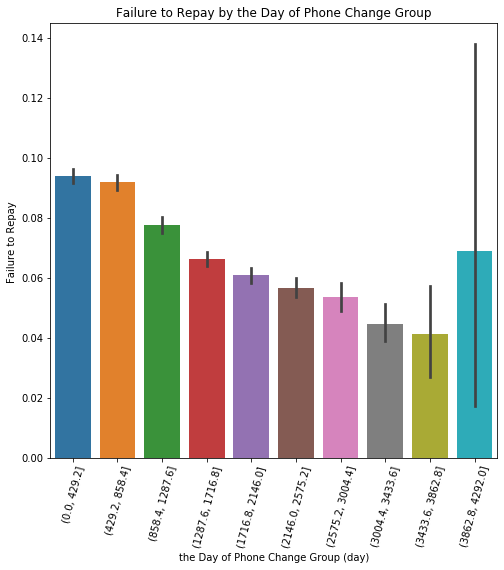

In [12]:
import seaborn as sns
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot

px = app_train["DAYS_LAST_PHONE_CHANGE_GROUP"] 
py = app_train["TARGET"]
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('the Day of Phone Change Group (day)'); plt.ylabel('Failure to Repay ')
plt.title('Failure to Repay by the Day of Phone Change Group');